In [63]:
%matplotlib notebook

In [64]:
# LSTM for SPY data 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [65]:
# convert an array of values into a p_t matrix
def create_dataset(p_t, dt_back=1):
	dataX, dataY = [], []
	for i in range(len(p_t)-dt_back-1):
		a = p_t[i:(i+dt_back), 0]
		dataX.append(a)
		dataY.append(p_t[i + dt_back, 0])
	return np.array(dataX), np.array(dataY)

In [66]:
# fix random seed for reproducibility
np.random.seed(7)

# load the p_t
df = read_csv('sp500.csv', usecols=[0], engine='python', skipfooter=3)
p_t = df.values       
p_t = p_t.astype('float32')

In [67]:
#p_t.shape   #df.values

In [68]:
# normalize the p_t
scaler = MinMaxScaler(feature_range=(0, 1))
p_t = scaler.fit_transform(p_t)

# split into train and test sets
N_train = int(len(p_t) * 0.67)
N_test = len(p_t) - N_train
train, test = p_t[0:N_train,:], p_t[N_train:len(p_t),:]

In [69]:
# reshape into X=t and Y=t+1
dt_back = 30     # look back time period
trainX, trainY = create_dataset(train, dt_back)
testX, testY = create_dataset(test, dt_back)

In [70]:
print(trainX.shape,trainY.shape)

(2746, 30) (2746,)


In [71]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))   # (trainX.shape[0], 1, trainX.shape[1])
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))   # (testX.shape[0], 1, testX.shape[1])

In [72]:
trainX.shape

(2746, 30, 1)

In [73]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(dt_back,1)))   # input_shape=(1, dt_back)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/5
26s - loss: 0.0022
Epoch 2/5
24s - loss: 3.2482e-04
Epoch 3/5
24s - loss: 2.5921e-04
Epoch 4/5
25s - loss: 2.0461e-04
Epoch 5/5
25s - loss: 1.7507e-04


In [74]:
# invert predictions
trainPredict1 = scaler.inverse_transform(trainPredict)
trainY1 = scaler.inverse_transform([trainY])
testPredict1 = scaler.inverse_transform(testPredict)
testY1 = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(p_t)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[dt_back:len(trainPredict1)+dt_back, :] = trainPredict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(p_t)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict1)+(dt_back*2)+1:len(p_t)-1, :] = testPredict1

Train Score: 18.14 RMSE
Test Score: 27.15 RMSE


In [75]:
#np.array(trainY1)   #.shape

trainY2 = np.reshape(trainY1,(trainY1.shape[1],trainY1.shape[0]))

<IPython.core.display.Javascript object>


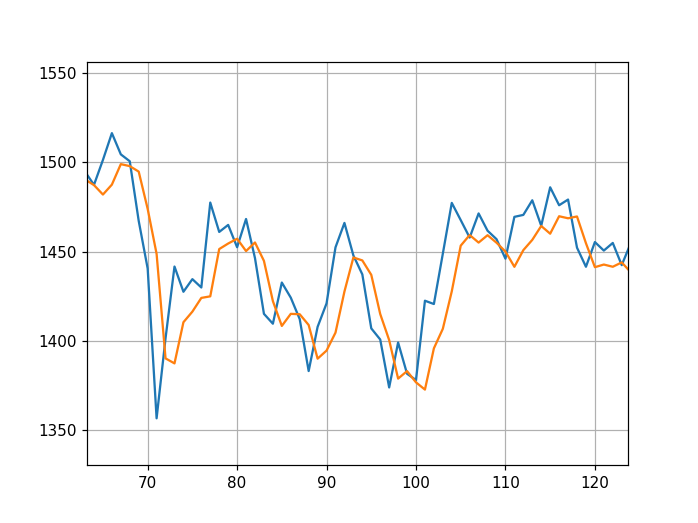

In [77]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(p_t))   # (trainY2)   # [2700:2900]
plt.plot(trainPredictPlot)   #(trainPredict1)    # [2700:2900]
plt.plot(testPredictPlot)    # [2700:2900]
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


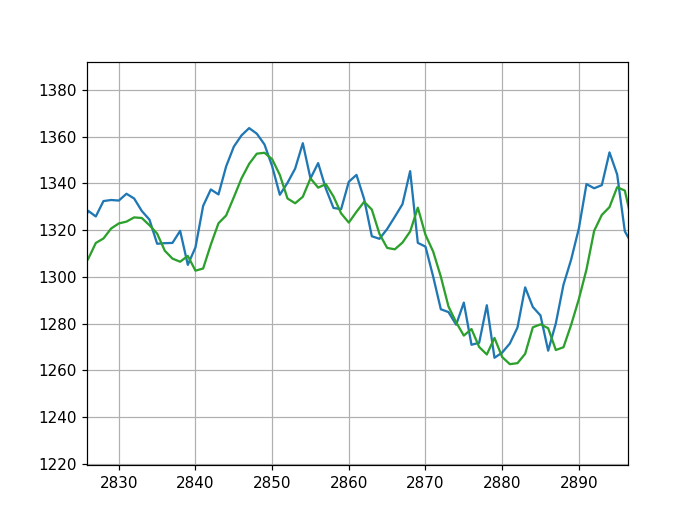

In [78]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(p_t))   # (trainY2)   # [2700:2900]
plt.plot(trainPredictPlot)   #(trainPredict1)    # [2700:2900]
plt.plot(testPredictPlot)    # [2700:2900]
plt.grid()
plt.show()